In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# colab 에서는 아래 모듈을 설치하고 불러와서 사용하세요. 

# !pip install koreanize-matplotlib

# import koreanize_matplotlib

In [35]:
# os 별로 폰트를 다르게 설정해 줍니다.
if os.name == "posix":
    # Mac
    sns.set(font="AppleGothic")
elif os.name == "nt":
    # Window
    sns.set(font="Malgun Gothic")
    
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.
%config InlineBackend.figure_format = 'retina'

In [36]:
# %ls data

In [37]:
from glob import glob

# glob("data/*.csv")

In [38]:
df_raw = pd.read_csv('../01.Semi/K-beautiful.csv', encoding='cp949')
df_raw.shape

(405, 41)

In [39]:
# "국가(대륙)별" 데이터 빈도수 세기
df_raw["국가(대륙)별"].value_counts()

국가(대륙)별
중국         45
일본         45
아세안        45
중동         45
기타 아시아     45
미국         45
캐나다        45
유럽연합+영국    45
기타 유럽      45
Name: count, dtype: int64

In [40]:
# 중국 데이터만 따로 보기
df_raw[df_raw["국가(대륙)별"] == "중국"].head()

,국가(대륙)별,상품군별,판매유형별,2014.1/4,2014.2/4,2014.3/4,2014.4/4,2015.1/4,2015.2/4,2015.3/4,...,2021.1/4,2021.2/4,2021.3/4,2021.4/4,2022.1/4,2022.2/4,2022.3/4,2022.4/4,2023.1/4,2023.2/4 p)
0,중국,합계,계,55066.0,68938.0,77525.0,117223.0,170201.0,183801.0,173699.0,...,1009003,1014908,833575,730082,402616,347097,269352,189995,141933,309247
1,중국,합계,면세점,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,963384,964465,789774,675565,358933,292208,205569,145545,104133,272120
2,중국,합계,면세점 이외,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45619,50443,43801,54517,43683,54889,63783,44450,37800,37127
3,중국,컴퓨터 및 주변기기,계,32.0,34.0,65.0,68.0,80.0,50.0,77.0,...,46,49,49,52,19,26,28,99,58,67
4,중국,컴퓨터 및 주변기기,면세점,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df = df_raw.melt(id_vars=["국가(대륙)별", "상품군별", "판매유형별"], 
                 var_name="기간", value_name="million")
df

,국가(대륙)별,상품군별,판매유형별,기간,million
0,중국,합계,계,2014.1/4,55066.0
1,중국,합계,면세점,2014.1/4,NaN
2,중국,합계,면세점 이외,2014.1/4,NaN
3,중국,컴퓨터 및 주변기기,계,2014.1/4,32.0
4,중국,컴퓨터 및 주변기기,면세점,2014.1/4,NaN
...,...,...,...,...,...
15385,기타 유럽,생활·자동차용품,면세점,2023.2/4 p),0
15386,기타 유럽,생활·자동차용품,면세점 이외,2023.2/4 p),6
15387,기타 유럽,기 타,계,2023.2/4 p),20
15388,기타 유럽,기 타,면세점,2023.2/4 p),0


In [42]:
df["연도"] = df["기간"].map(lambda x: x.split('.')[0])
df

,국가(대륙)별,상품군별,판매유형별,기간,million,연도
0,중국,합계,계,2014.1/4,55066.0,2014
1,중국,합계,면세점,2014.1/4,NaN,2014
2,중국,합계,면세점 이외,2014.1/4,NaN,2014
3,중국,컴퓨터 및 주변기기,계,2014.1/4,32.0,2014
4,중국,컴퓨터 및 주변기기,면세점,2014.1/4,NaN,2014
...,...,...,...,...,...,...
15385,기타 유럽,생활·자동차용품,면세점,2023.2/4 p),0,2023
15386,기타 유럽,생활·자동차용품,면세점 이외,2023.2/4 p),6,2023
15387,기타 유럽,기 타,계,2023.2/4 p),20,2023
15388,기타 유럽,기 타,면세점,2023.2/4 p),0,2023


In [43]:
int("2019 3/4 p)".split()[1].split("/")[0])

3

In [44]:
df["분기"] = df["기간"].apply(lambda  x : x.split('.')[1].split("/")[0])
df["분기"] = df["분기"].astype(int)
df["연도"] = df["연도"].astype(int)
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
0,중국,합계,계,2014.1/4,55066.0,2014,1
1,중국,합계,면세점,2014.1/4,NaN,2014,1
2,중국,합계,면세점 이외,2014.1/4,NaN,2014,1
3,중국,컴퓨터 및 주변기기,계,2014.1/4,32.0,2014,1
4,중국,컴퓨터 및 주변기기,면세점,2014.1/4,NaN,2014,1


In [45]:
df["million"] = df["million"].replace("-", np.nan).astype(float)
df

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
0,중국,합계,계,2014.1/4,55066.0,2014,1
1,중국,합계,면세점,2014.1/4,NaN,2014,1
2,중국,합계,면세점 이외,2014.1/4,NaN,2014,1
3,중국,컴퓨터 및 주변기기,계,2014.1/4,32.0,2014,1
4,중국,컴퓨터 및 주변기기,면세점,2014.1/4,NaN,2014,1
...,...,...,...,...,...,...,...
15385,기타 유럽,생활·자동차용품,면세점,2023.2/4 p),0.0,2023,2
15386,기타 유럽,생활·자동차용품,면세점 이외,2023.2/4 p),6.0,2023,2
15387,기타 유럽,기 타,계,2023.2/4 p),20.0,2023,2
15388,기타 유럽,기 타,면세점,2023.2/4 p),0.0,2023,2


In [46]:
# 합계 데이터는 따로 구할 수 있기 때문에 전체 데이터에서 제거합니다.
df = df[(df["국가(대륙)별"] != "합계") & 
        (df["상품군별"] != "합계") & 
        (df["판매유형별"] != "계")].copy()
df

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
4,중국,컴퓨터 및 주변기기,면세점,2014.1/4,NaN,2014,1
5,중국,컴퓨터 및 주변기기,면세점 이외,2014.1/4,NaN,2014,1
7,중국,가전·전자·통신기기,면세점,2014.1/4,NaN,2014,1
8,중국,가전·전자·통신기기,면세점 이외,2014.1/4,NaN,2014,1
10,중국,소프트웨어,면세점,2014.1/4,NaN,2014,1
...,...,...,...,...,...,...,...
15383,기타 유럽,농축수산물,면세점 이외,2023.2/4 p),0.0,2023,2
15385,기타 유럽,생활·자동차용품,면세점,2023.2/4 p),0.0,2023,2
15386,기타 유럽,생활·자동차용품,면세점 이외,2023.2/4 p),6.0,2023,2
15388,기타 유럽,기 타,면세점,2023.2/4 p),0.0,2023,2


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9576 entries, 4 to 15389
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  9576 non-null   object 
 1   상품군별     9576 non-null   object 
 2   판매유형별    9576 non-null   object 
 3   기간       9576 non-null   object 
 4   million  4536 non-null   float64
 5   연도       9576 non-null   int32  
 6   분기       9576 non-null   int32  
dtypes: float64(1), int32(2), object(4)
memory usage: 523.7+ KB


In [48]:
df.isnull().sum()

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
million    5040
연도            0
분기            0
dtype: int64

<Axes: xlabel='연도', ylabel='million'>

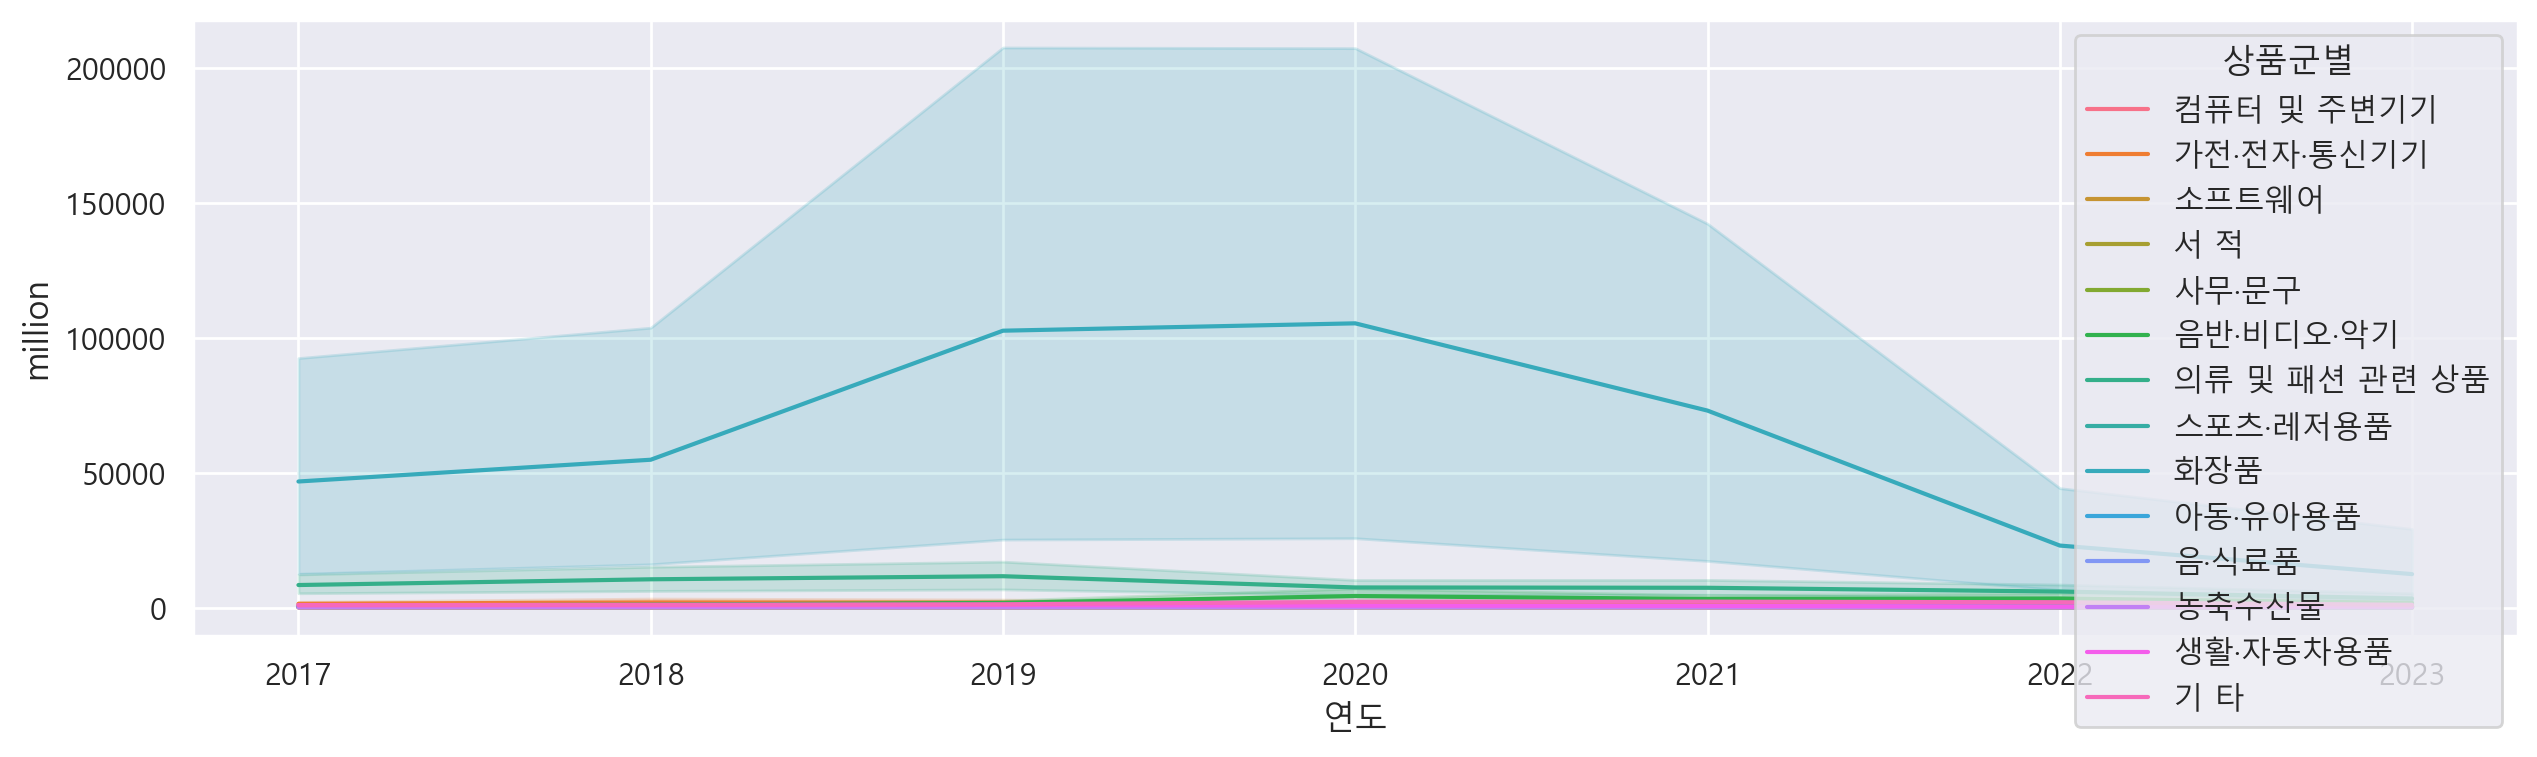

In [49]:
plt.figure(figsize=(15, 4))
sns.lineplot(x="연도", y="million", data=df, hue="상품군별")

c:\Users\manos\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


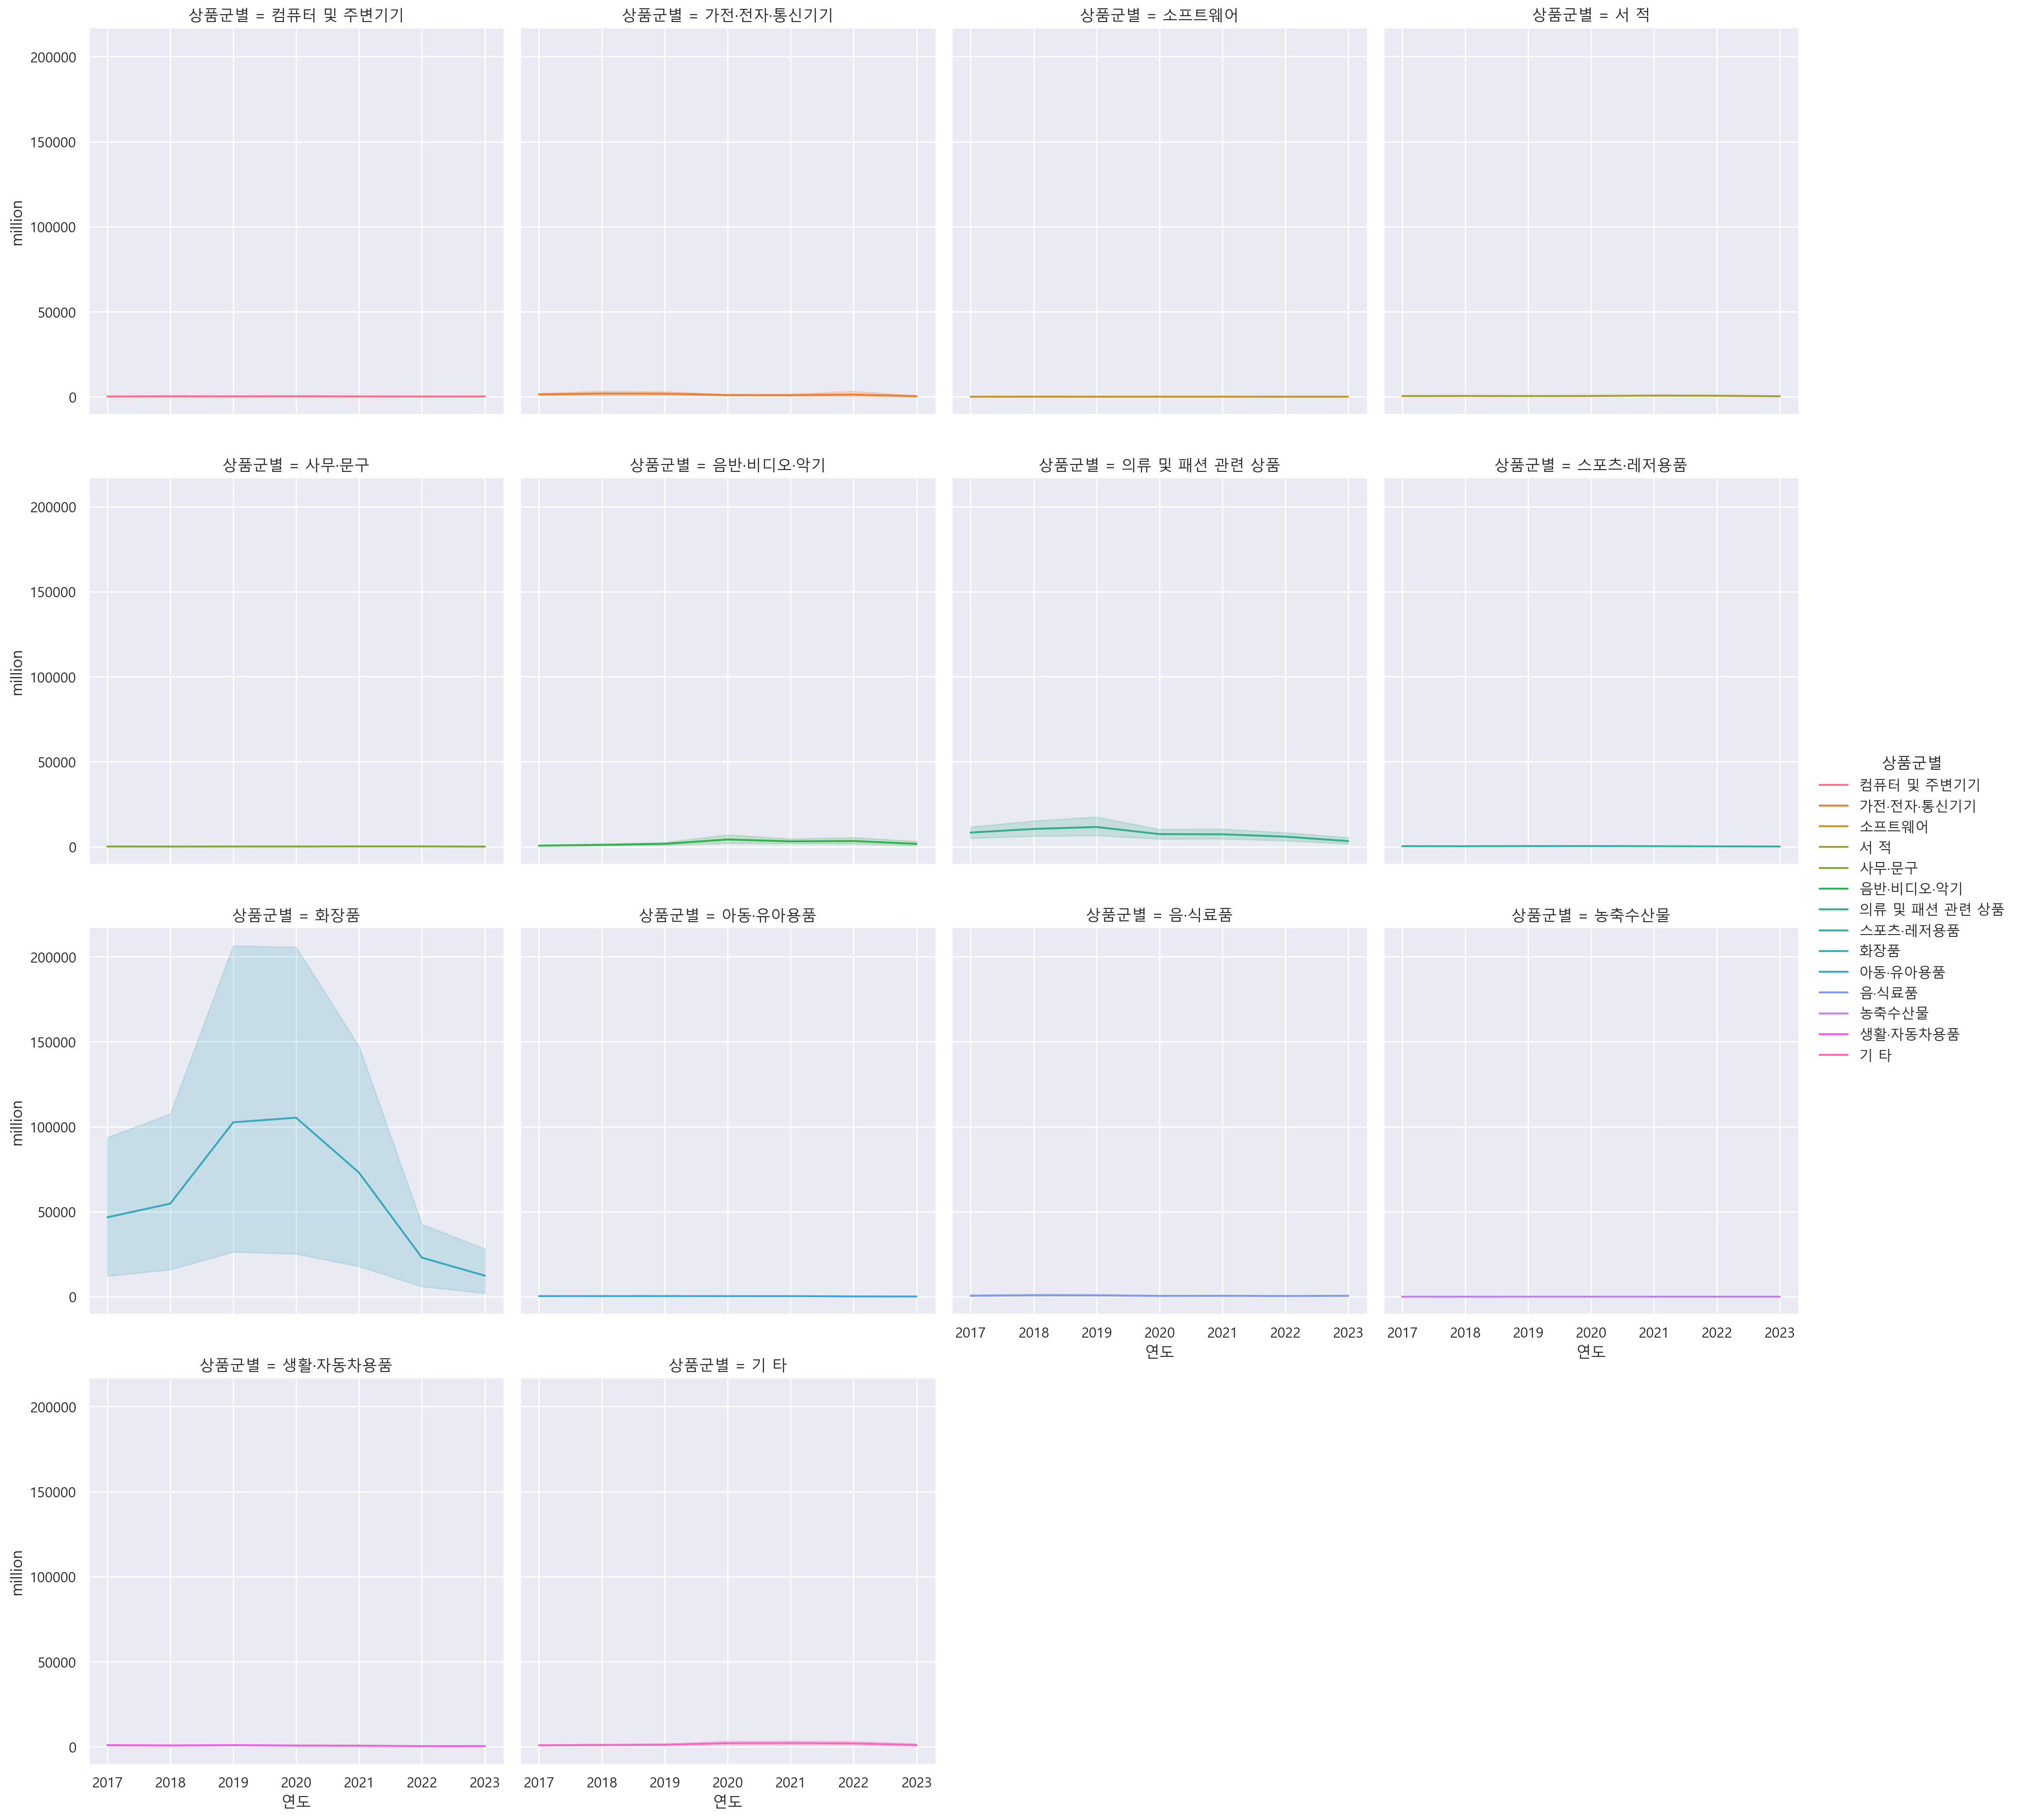

In [50]:
sns.relplot(x="연도", y="million", data=df, hue="상품군별", col="상품군별", col_wrap=4, kind="line")

In [51]:
df_sub =  df[~df["상품군별"].isin(["화장품"])]
df_sub

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
4,중국,컴퓨터 및 주변기기,면세점,2014.1/4,NaN,2014,1
5,중국,컴퓨터 및 주변기기,면세점 이외,2014.1/4,NaN,2014,1
7,중국,가전·전자·통신기기,면세점,2014.1/4,NaN,2014,1
8,중국,가전·전자·통신기기,면세점 이외,2014.1/4,NaN,2014,1
10,중국,소프트웨어,면세점,2014.1/4,NaN,2014,1
...,...,...,...,...,...,...,...
15383,기타 유럽,농축수산물,면세점 이외,2023.2/4 p),0.0,2023,2
15385,기타 유럽,생활·자동차용품,면세점,2023.2/4 p),0.0,2023,2
15386,기타 유럽,생활·자동차용품,면세점 이외,2023.2/4 p),6.0,2023,2
15388,기타 유럽,기 타,면세점,2023.2/4 p),0.0,2023,2


c:\Users\manos\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


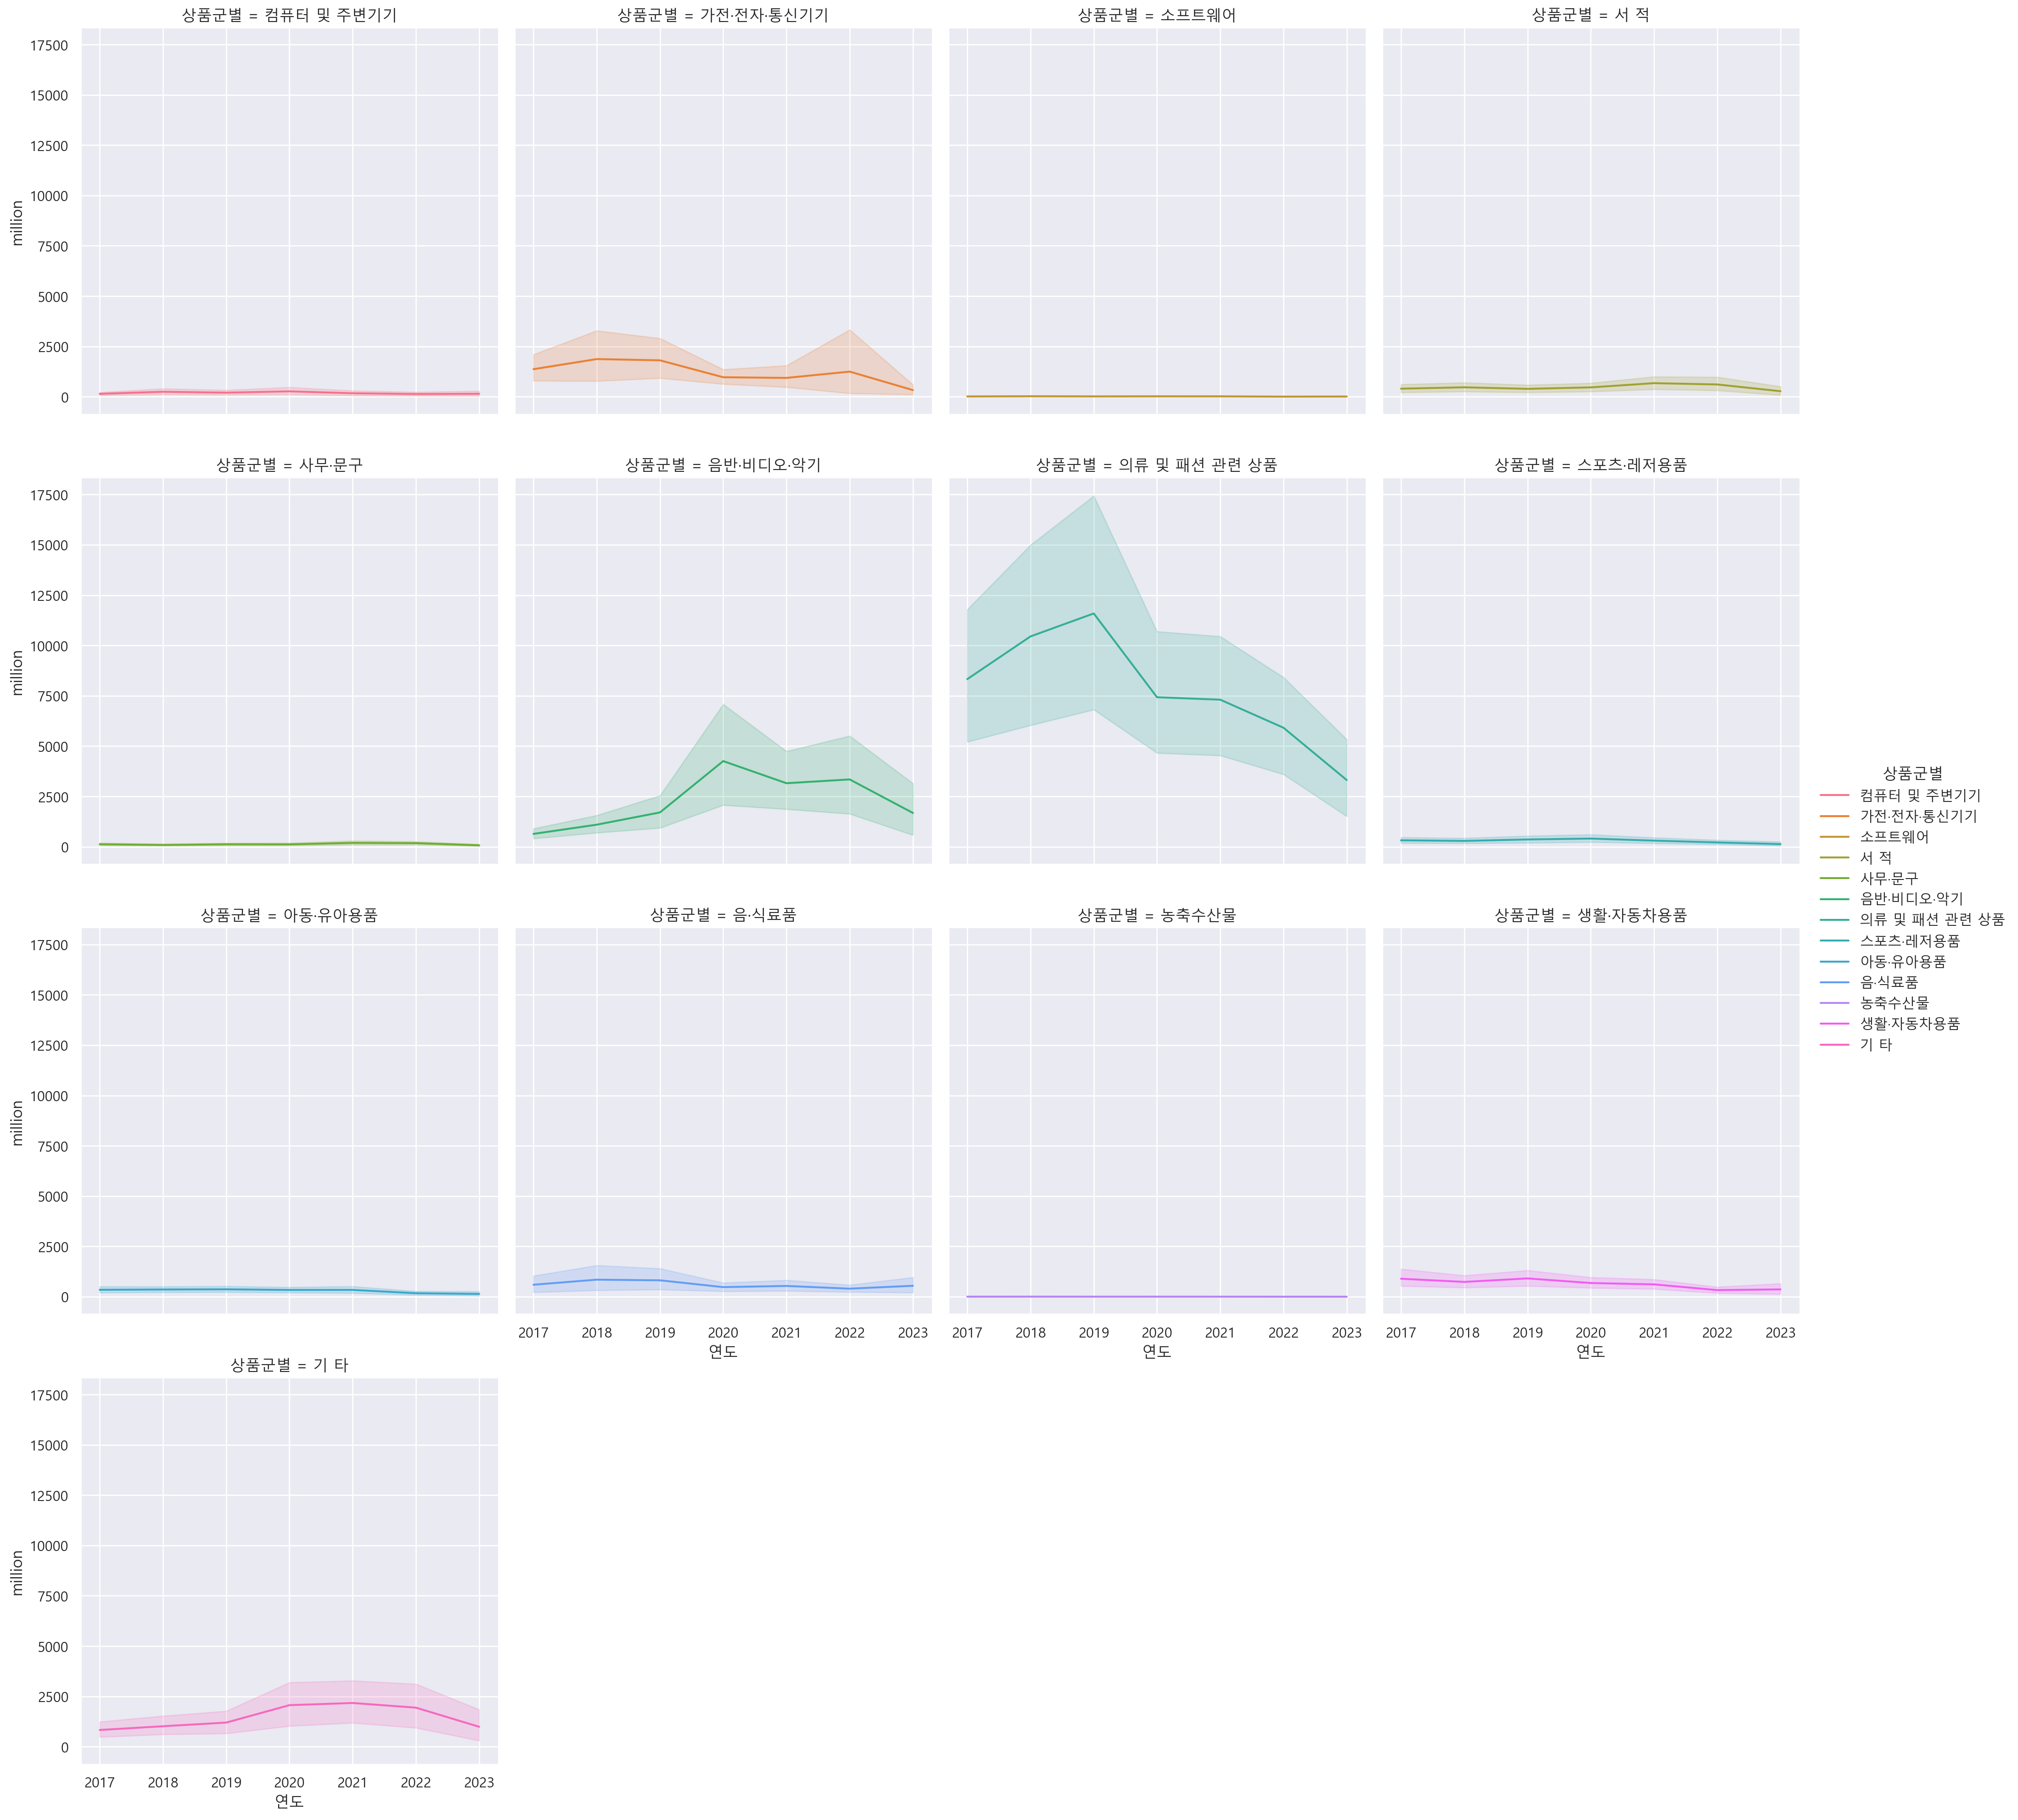

In [52]:
sns.relplot(x="연도", y="million", data=df_sub, 
            hue="상품군별", col="상품군별", col_wrap=4, kind="line")

### 화장품의 온라인쇼핑 해외직접판매액

<Axes: xlabel='연도', ylabel='million'>

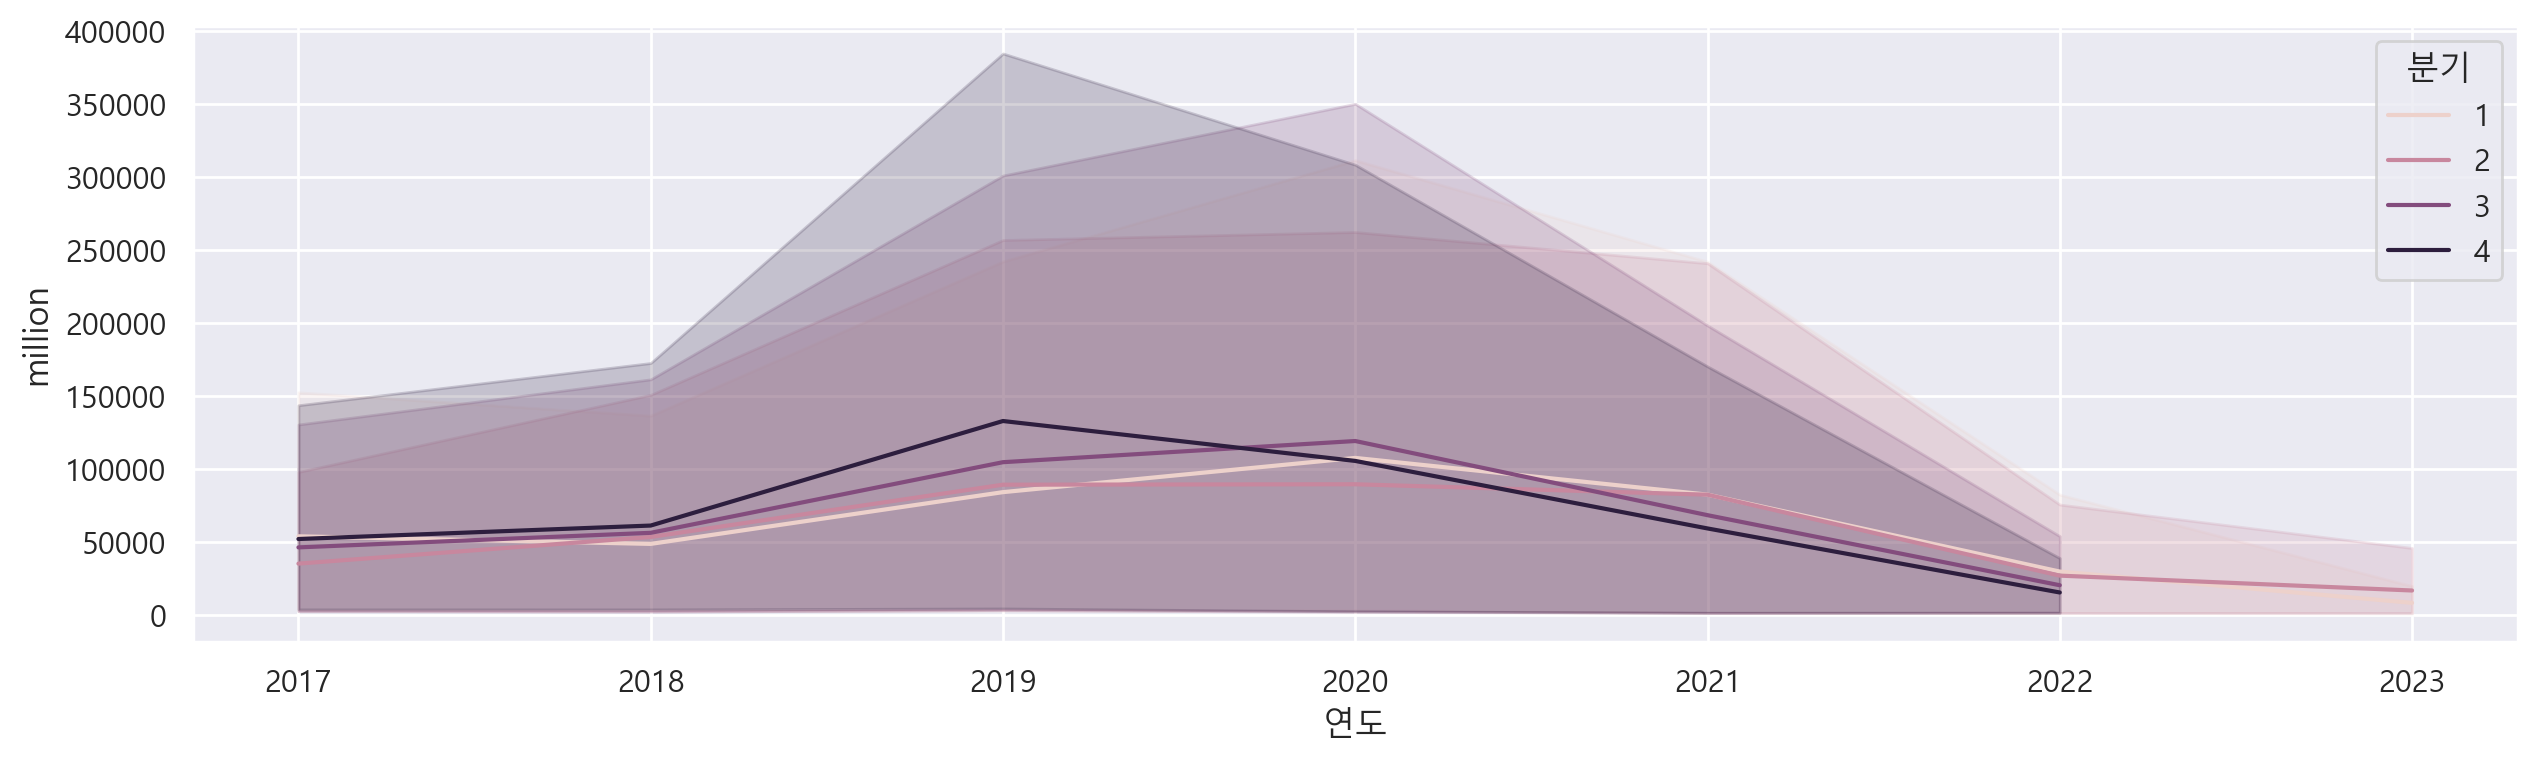

In [53]:
df_cosmetic = df[(df["상품군별"] == "화장품")]
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_cosmetic, x="연도", y="million", hue="분기")

<Axes: xlabel='기간', ylabel='million'>

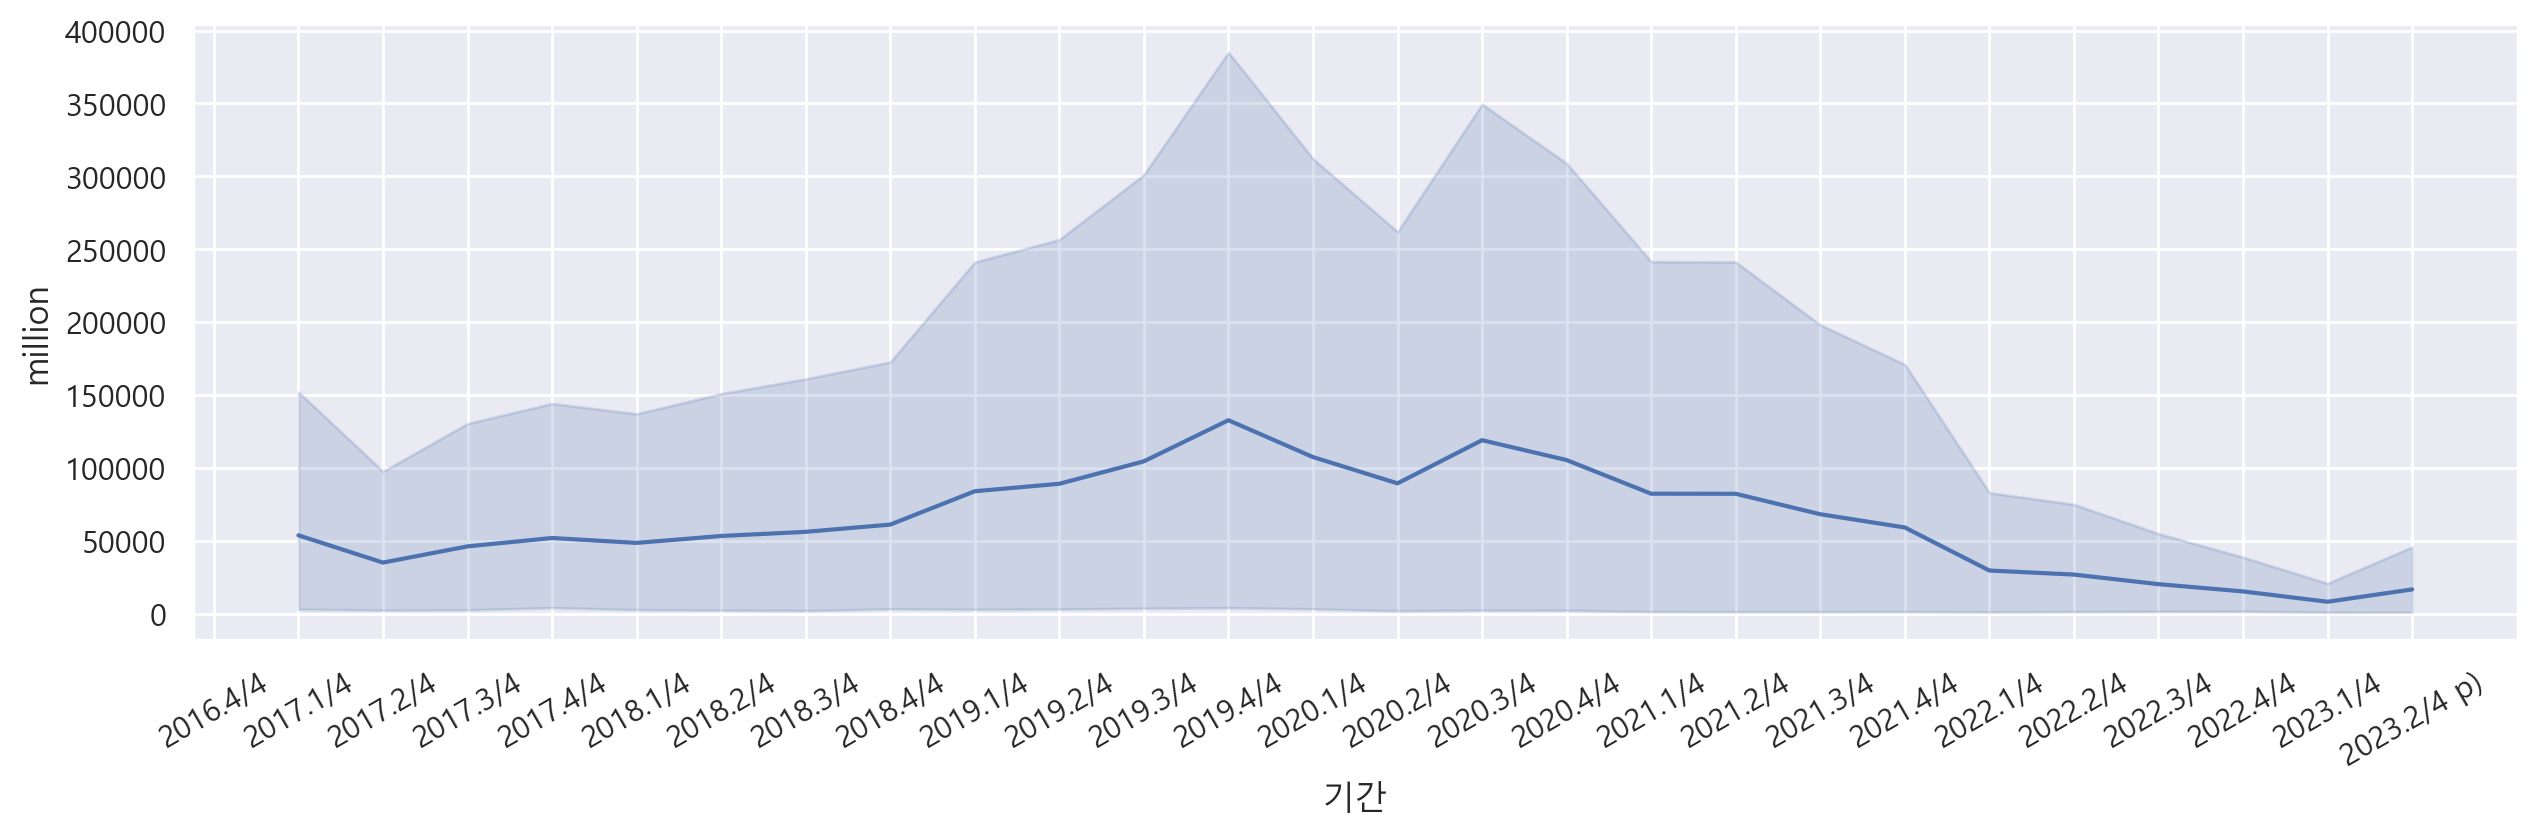

In [55]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="million")

<Axes: xlabel='기간', ylabel='million'>

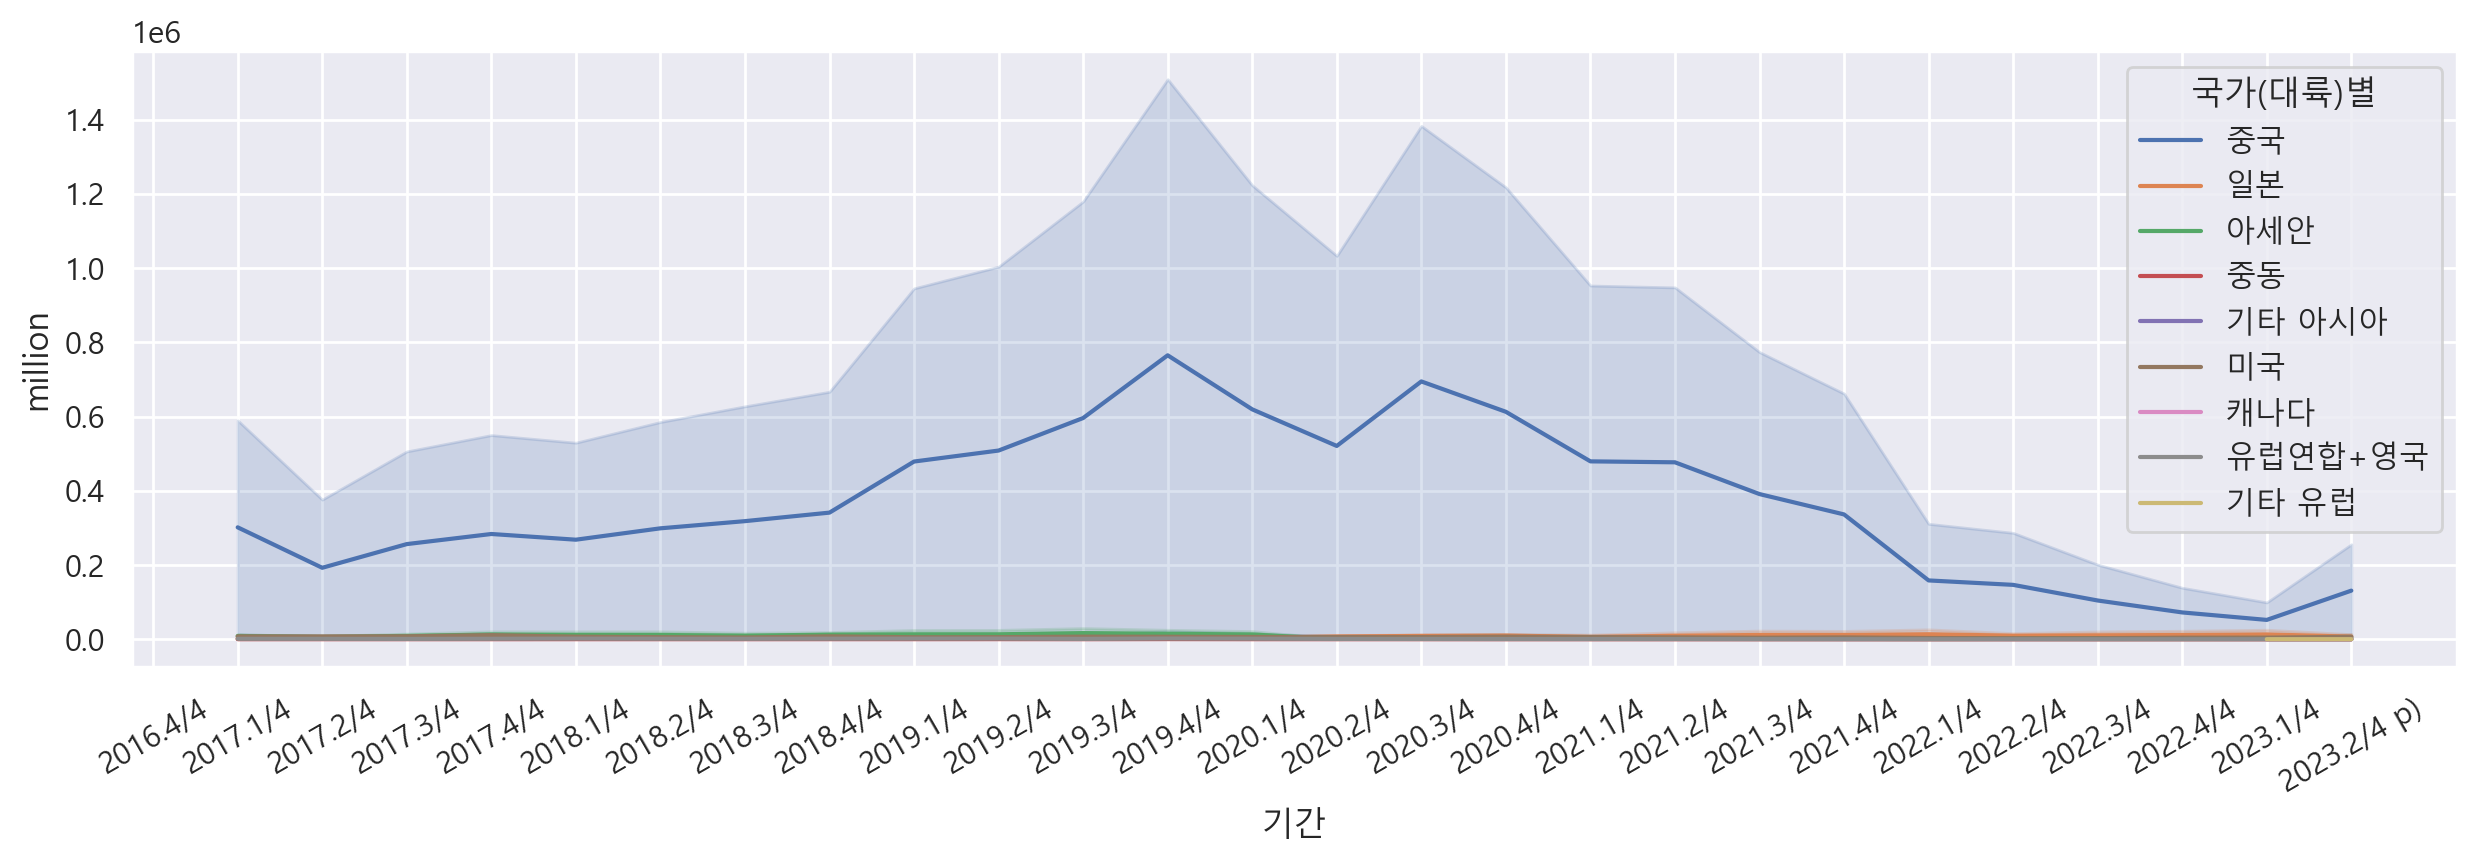

In [56]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="million", hue="국가(대륙)별")

<Axes: xlabel='기간', ylabel='million'>

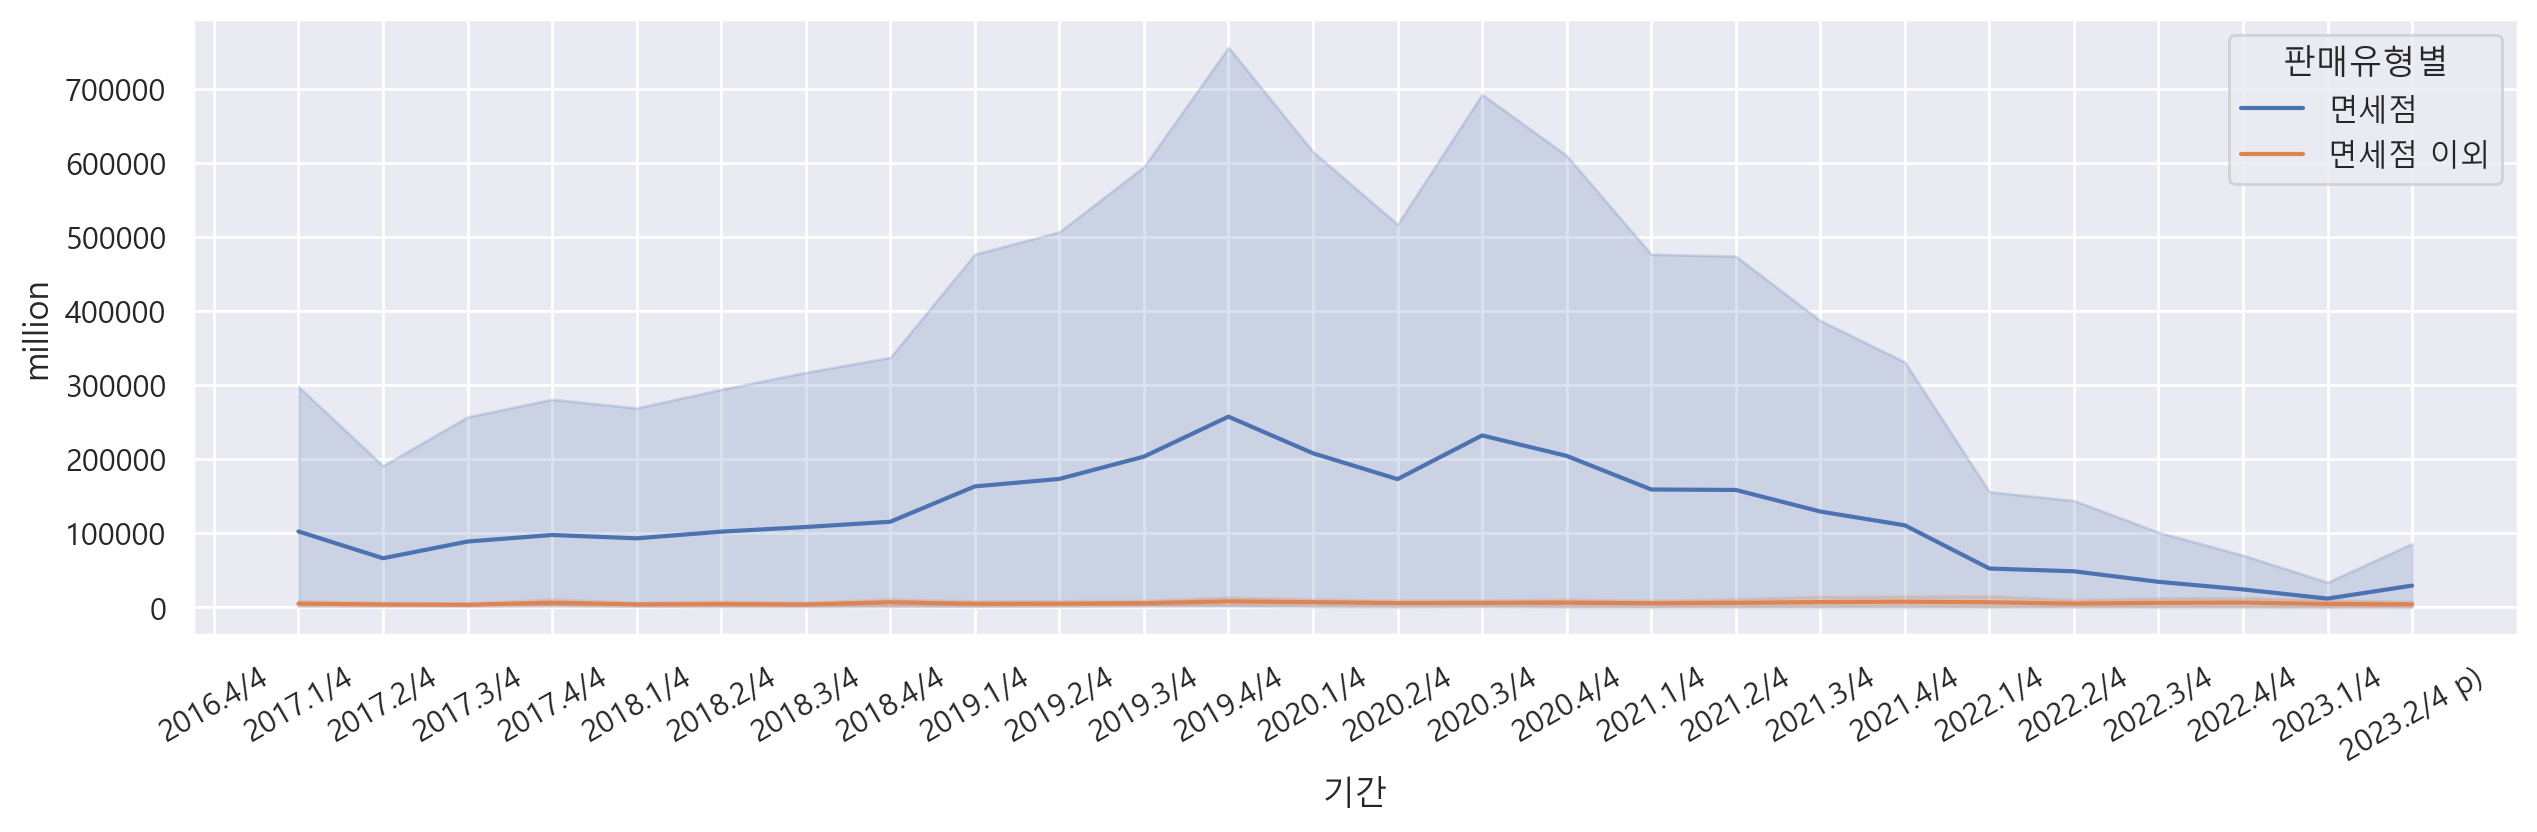

In [59]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="million", hue="판매유형별")

### 의류 및 패션관련 상품 온라인쇼핑 해외직접판매액

<Axes: title={'center': '의류 및 패션관련 상품'}, xlabel='기간', ylabel='million'>

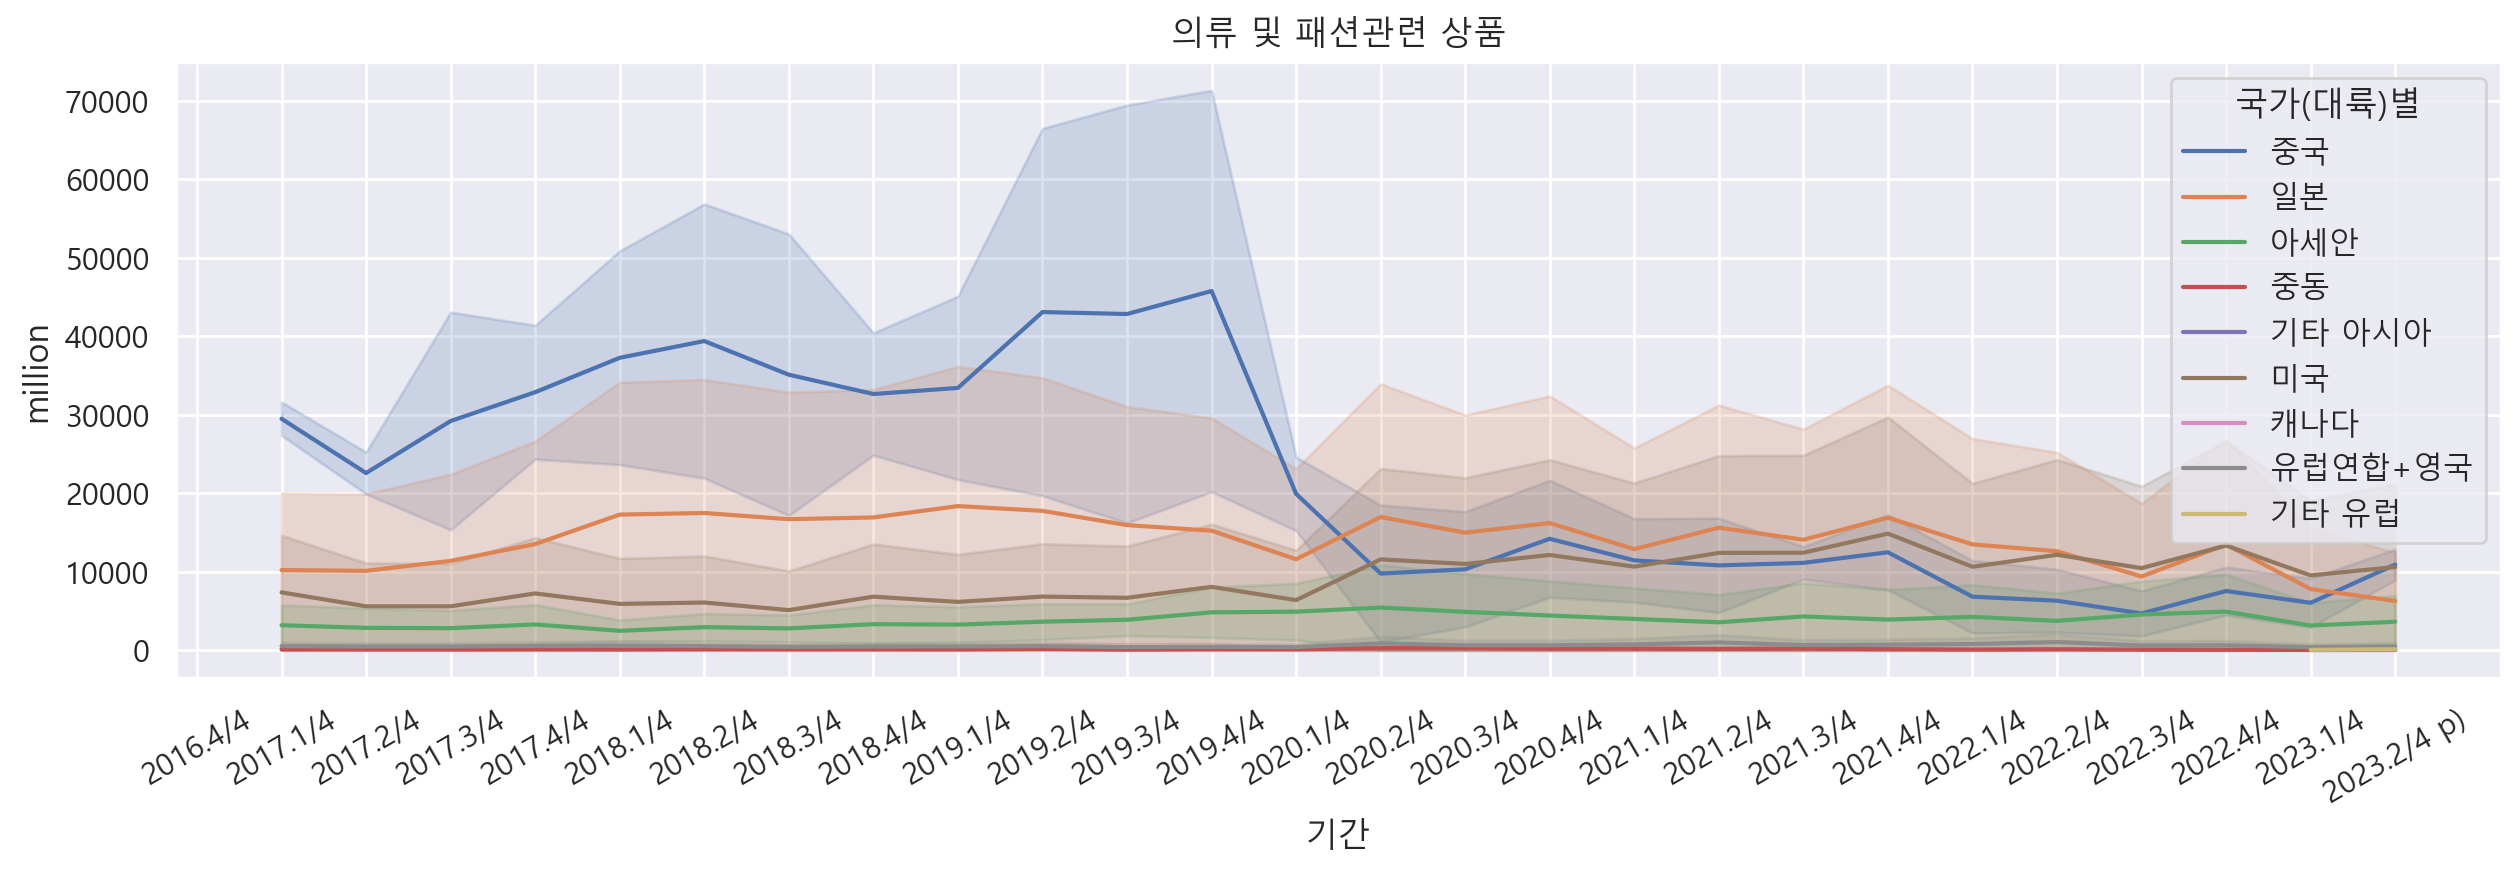

In [60]:
df_fashion = df[df["상품군별"].str.contains("의류")]
plt.figure(figsize=(15, 4))
plt.title("의류 및 패션관련 상품")
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion, x="기간", y="million", hue="국가(대륙)별")

<Axes: xlabel='기간', ylabel='million'>

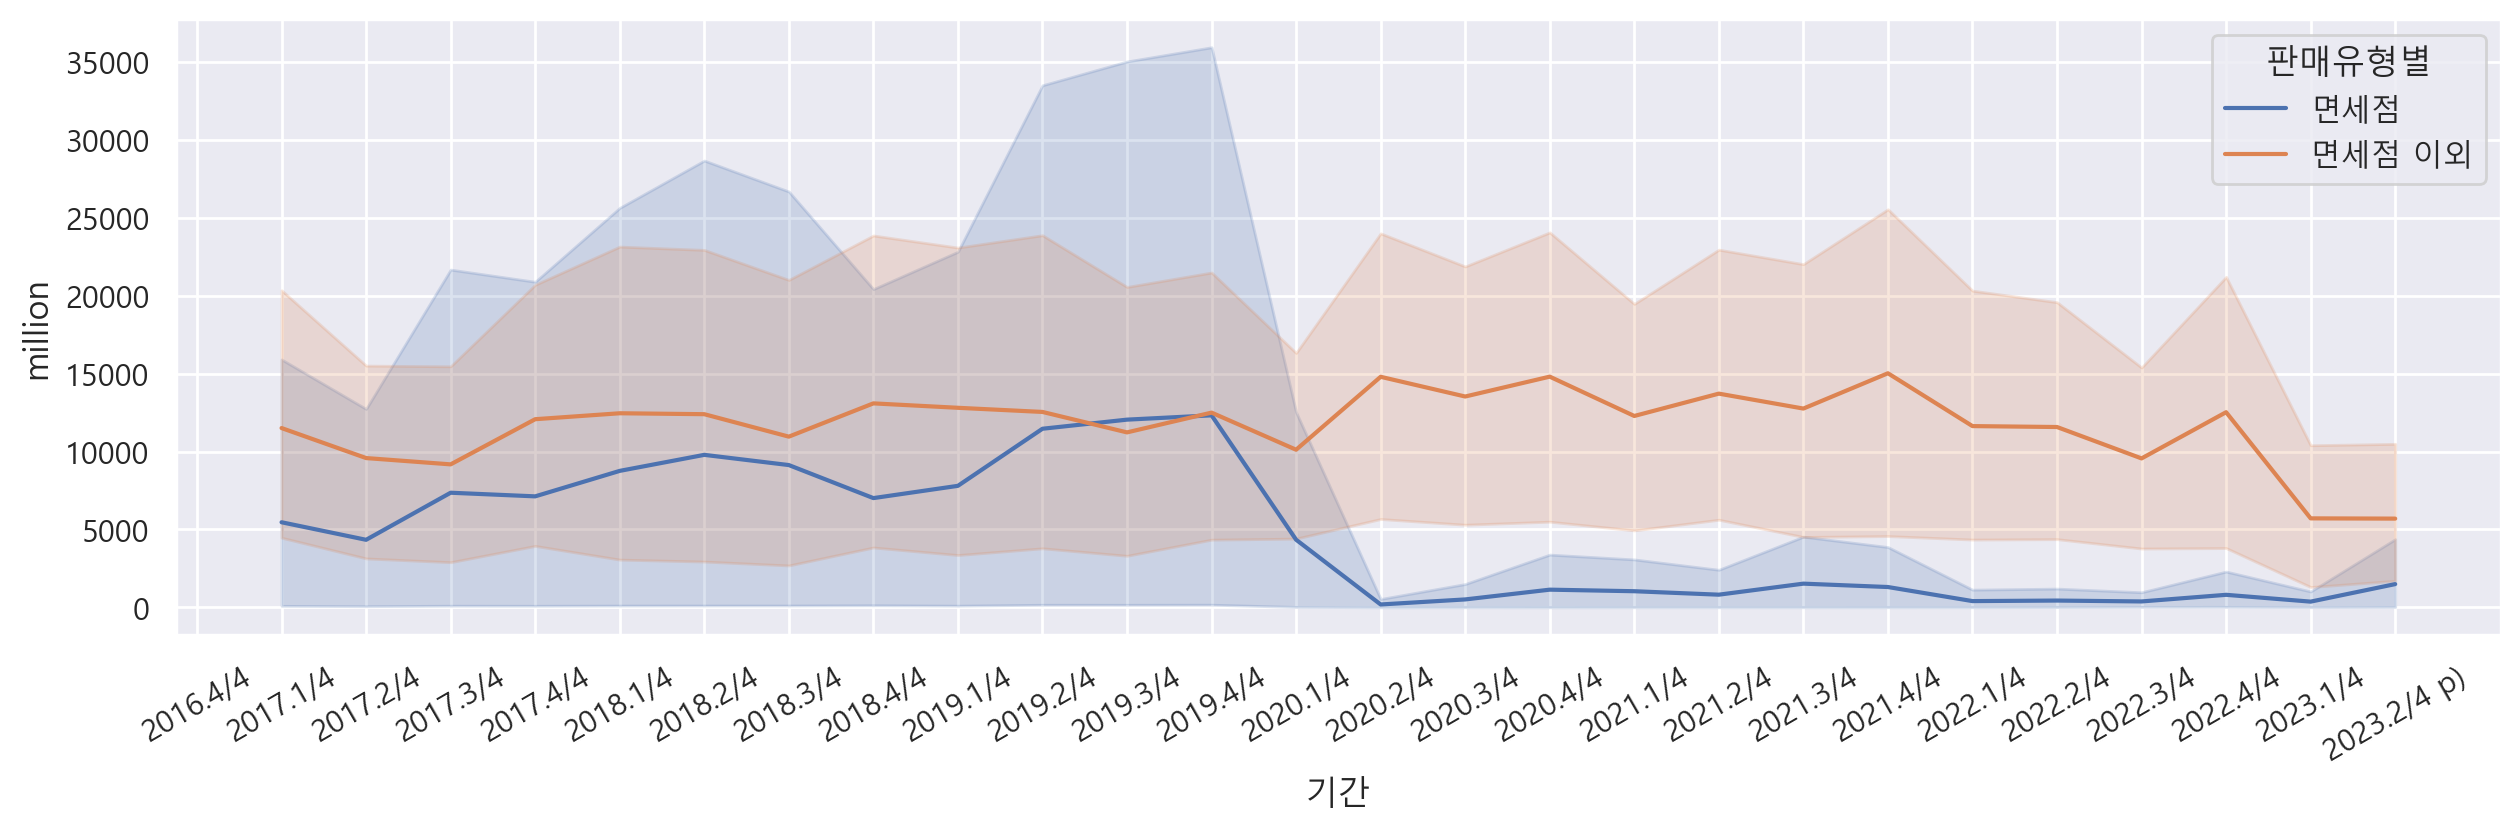

In [61]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion, x="기간", y="million", hue="판매유형별")

In [62]:
pivot = df_fashion.pivot_table(
    index="국가(대륙)별", values="million", 
    columns="연도", aggfunc="sum")
pivot

연도,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
국가(대륙)별,,,,,,,,,,
기타 아시아,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,308.0
기타 유럽,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,363.0
미국,0.0,0.0,0.0,51638.0,47875.0,55536.0,82217.0,100721.0,93222.0,40302.0
아세안,0.0,0.0,0.0,24297.0,23068.0,31247.0,39365.0,31549.0,34966.0,13573.0
유럽연합+영국,0.0,0.0,0.0,4091.0,4114.0,3694.0,5128.0,6225.0,6174.0,1775.0
일본,0.0,0.0,0.0,90531.0,136800.0,134637.0,119533.0,118967.0,97945.0,28156.0
중국,0.0,0.0,0.0,228330.0,288848.0,330267.0,108464.0,91770.0,50767.0,33935.0
중동,0.0,0.0,0.0,808.0,879.0,951.0,1776.0,1462.0,713.0,171.0
캐나다,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,700.0


<Axes: xlabel='연도', ylabel='국가(대륙)별'>

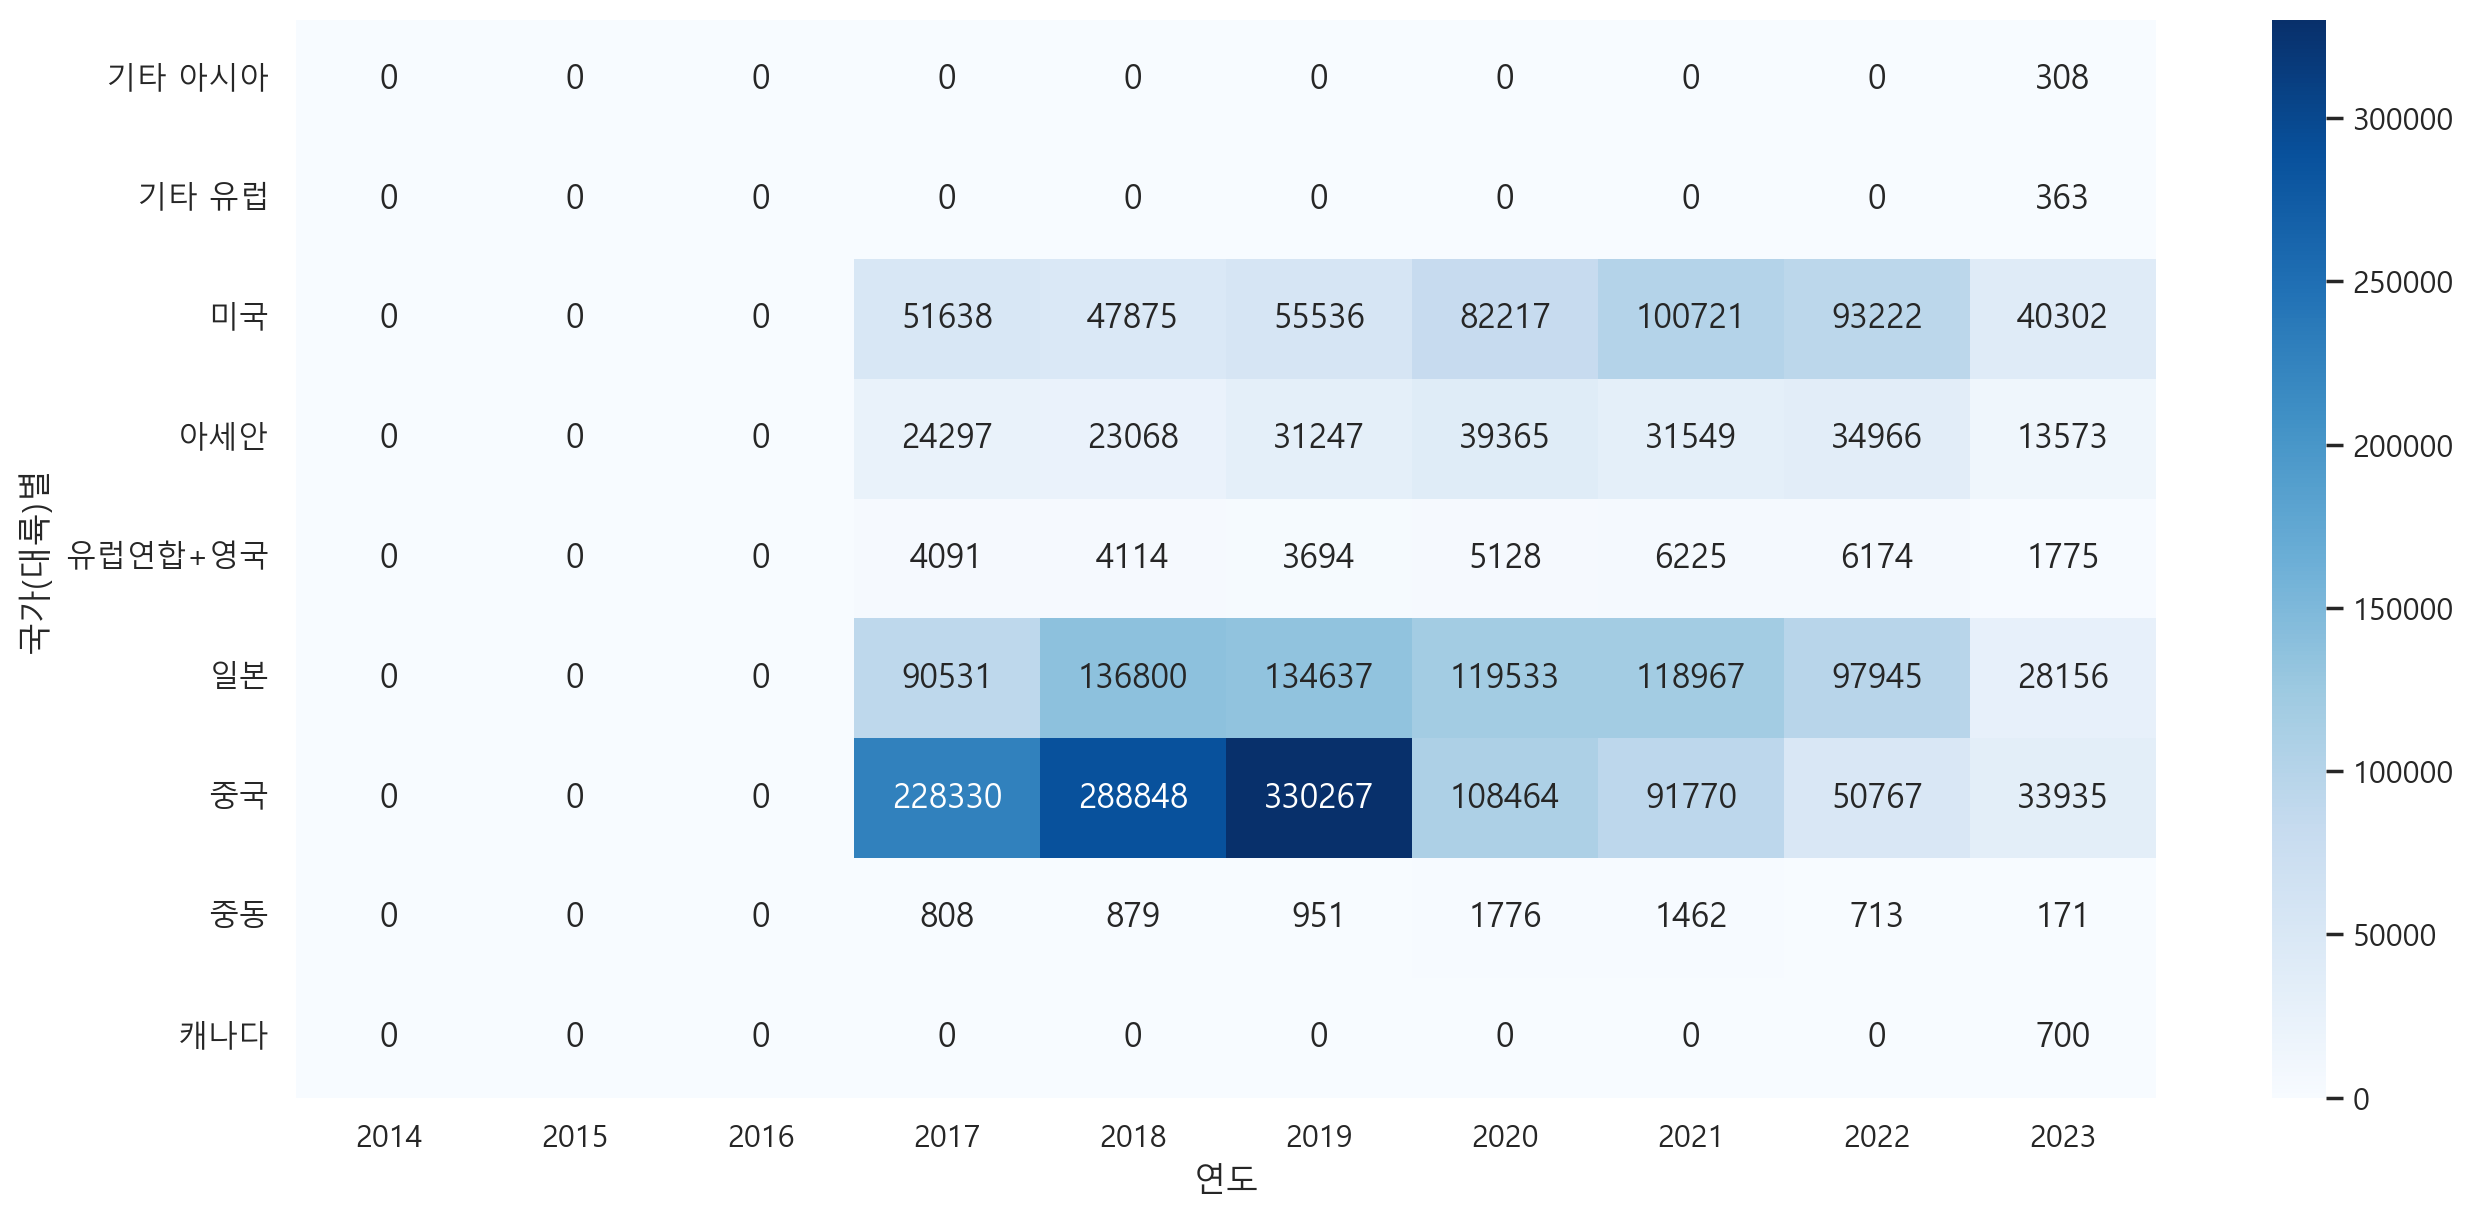

In [63]:
plt.figure(figsize=(15, 7))
sns.heatmap(pivot, cmap="Blues", annot=True, fmt=".0f")

<Axes: xlabel='연도', ylabel='million'>

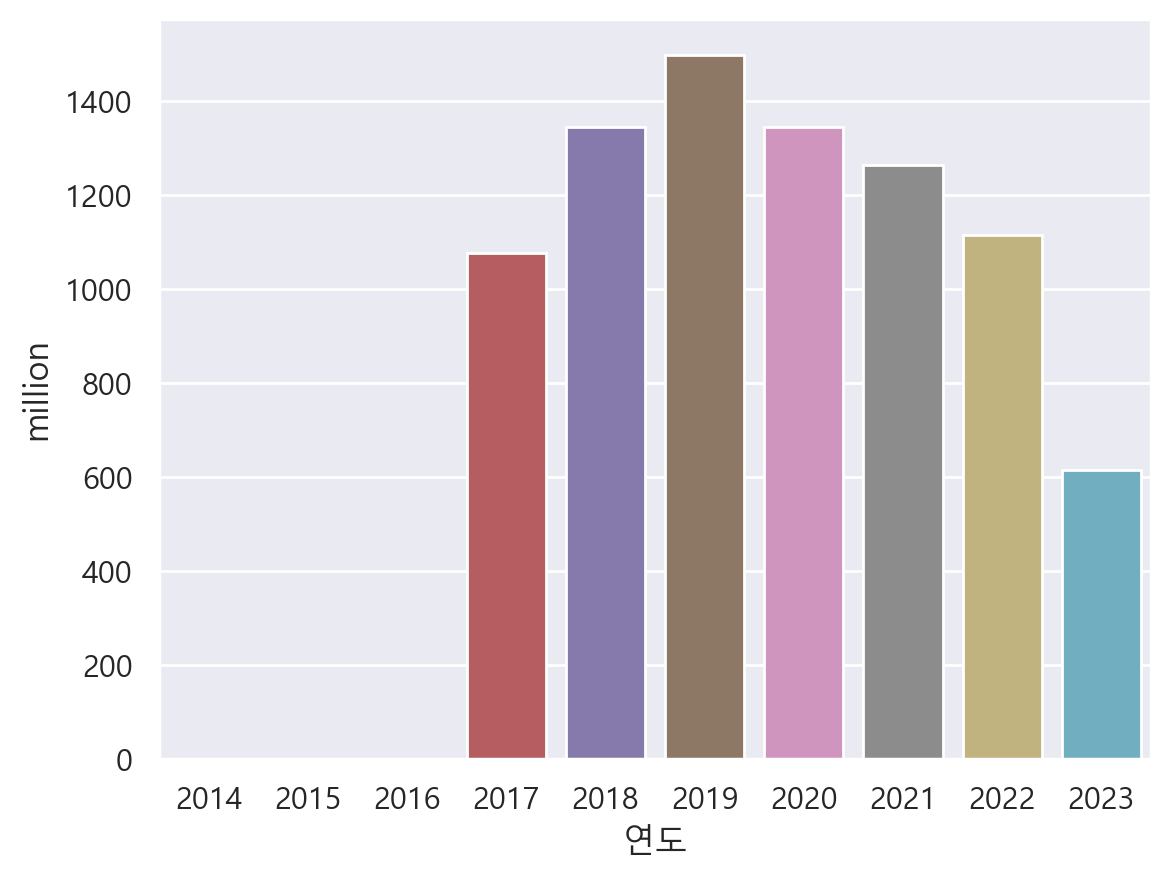

In [64]:
sns.barplot(x="연도", y="million", data=df_sub, errorbar=None)

<Axes: xlabel='연도', ylabel='million'>

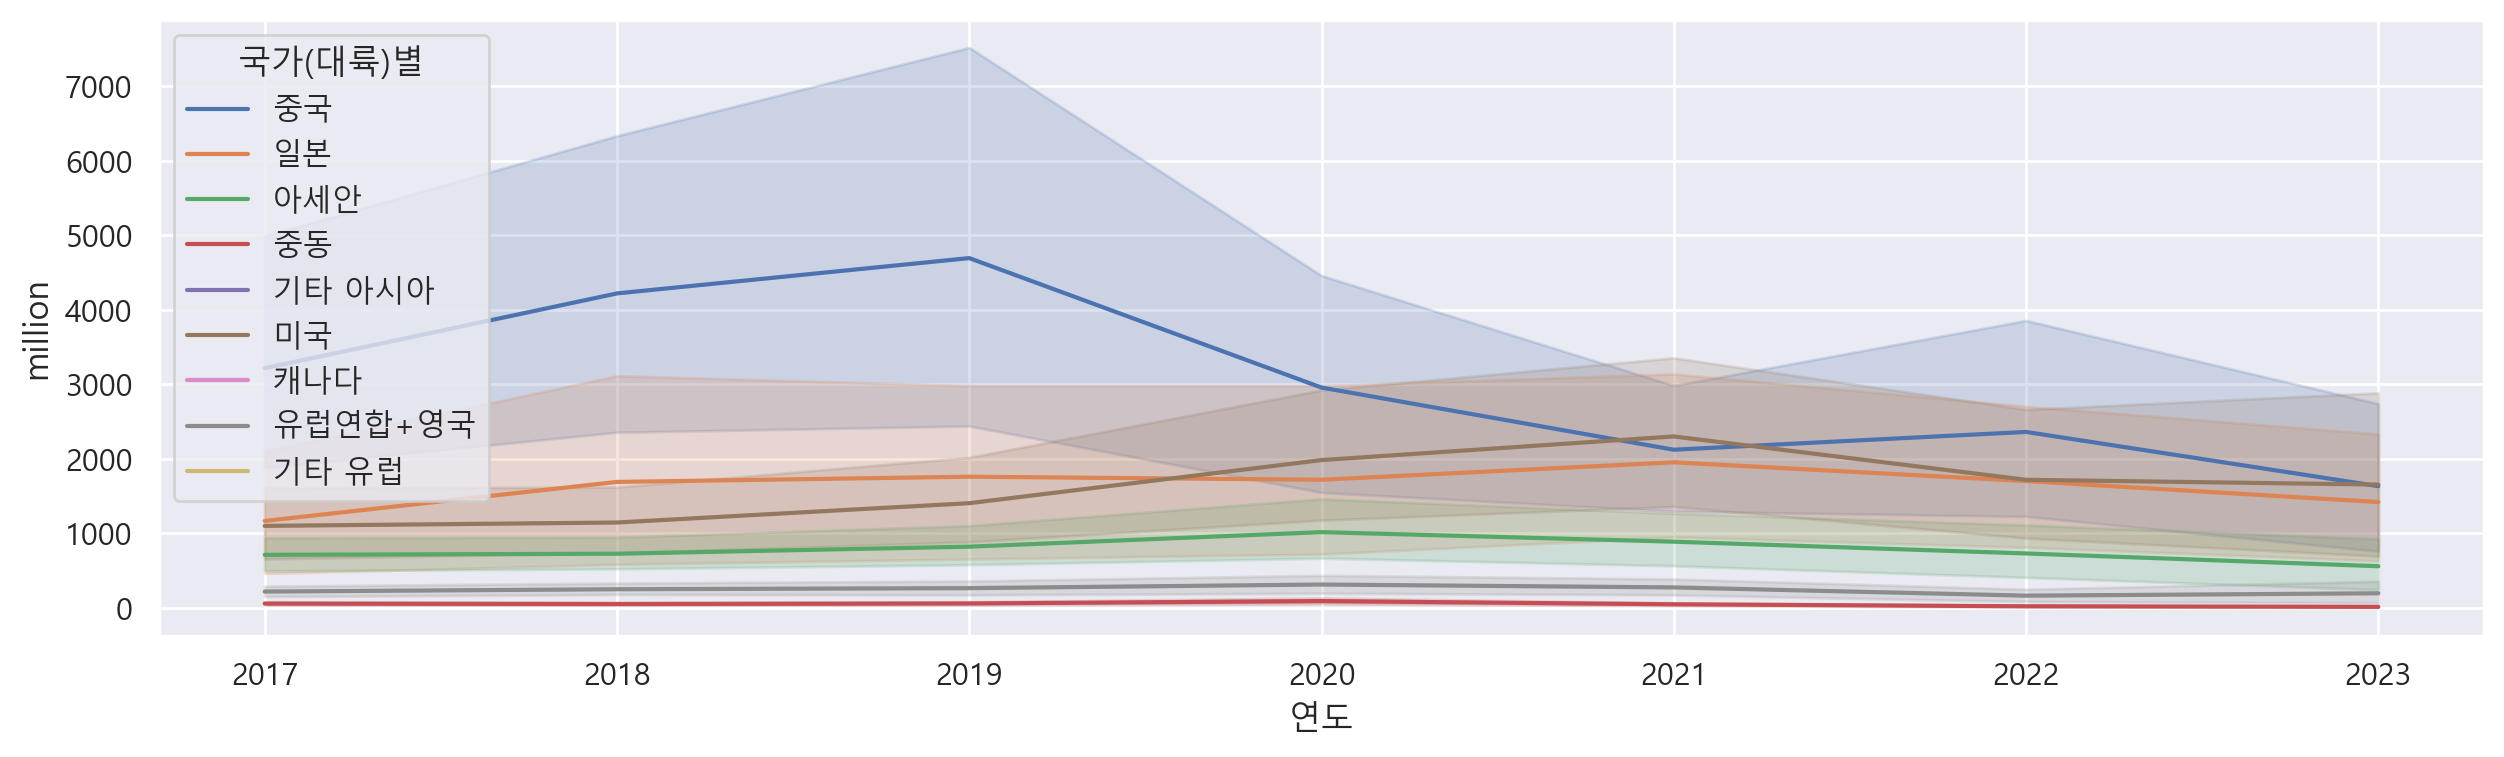

In [66]:
plt.figure(figsize=(15, 4))
sns.lineplot(x="연도", y="million", data=df_sub, hue="국가(대륙)별")

* lengend를 그래프의 밖에 그리기 : [matplotlib - Move legend outside figure in seaborn tsplot - Stack Overflow](https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot)

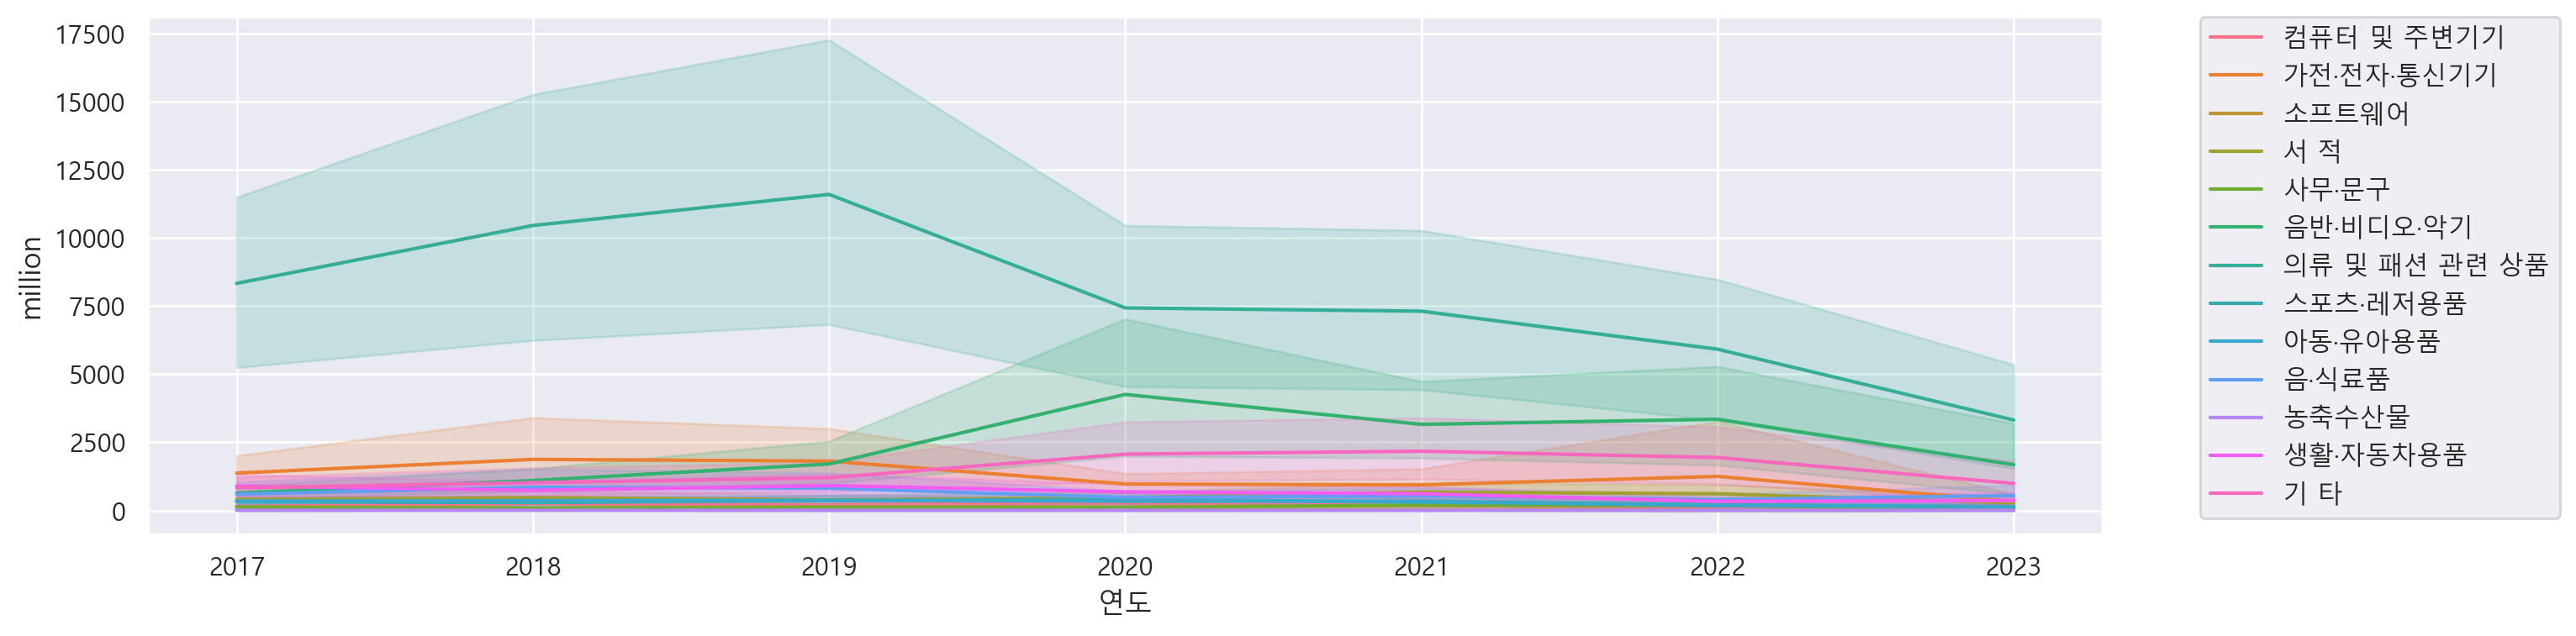

In [67]:
plt.figure(figsize=(15, 4))
sns.lineplot(x="연도", y="million", data=df_sub, hue="상품군별")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [69]:
df['쿼터'] = df['기간'].map(lambda period : period.split('.')[1])
df

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기,쿼터
4,중국,컴퓨터 및 주변기기,면세점,2014.1/4,NaN,2014,1,1/4
5,중국,컴퓨터 및 주변기기,면세점 이외,2014.1/4,NaN,2014,1,1/4
7,중국,가전·전자·통신기기,면세점,2014.1/4,NaN,2014,1,1/4
8,중국,가전·전자·통신기기,면세점 이외,2014.1/4,NaN,2014,1,1/4
10,중국,소프트웨어,면세점,2014.1/4,NaN,2014,1,1/4
...,...,...,...,...,...,...,...,...
15383,기타 유럽,농축수산물,면세점 이외,2023.2/4 p),0.0,2023,2,2/4 p)
15385,기타 유럽,생활·자동차용품,면세점,2023.2/4 p),0.0,2023,2,2/4 p)
15386,기타 유럽,생활·자동차용품,면세점 이외,2023.2/4 p),6.0,2023,2,2/4 p)
15388,기타 유럽,기 타,면세점,2023.2/4 p),0.0,2023,2,2/4 p)
